<a href="https://colab.research.google.com/github/Qind1609/ImgProcessing-Pytorch-CNN/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Processing

**Mount Drive**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Import Packages**

In [2]:
from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
#check cv2
cv2.__version__

'4.1.2'

**Input an image** 

In [3]:
folder_dir = r"/content/drive/MyDrive/T.A/image"
print("My image: {} images".format(len(os.listdir(folder_dir)))) #print number of images in folder

My image: 9 images


(720, 1080, 3)


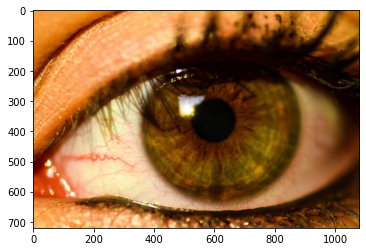

In [4]:
# Read Image
image = cv2.imread(os.path.join(folder_dir, "eye.jpg"))

# Convert BGR image to RGB image 
image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# size of image RowxColx3
print(image.shape)

# display image
plt.imshow(image_1)



**Display 3 channel**

[[252 252 252 ... 221 221 221]
 [252 252 252 ... 221 221 221]
 [252 252 252 ... 220 220 220]
 ...
 [251 252 253 ... 161 161 162]
 [252 251 253 ... 166 166 167]
 [251 251 254 ... 168 169 169]]
[[252 252 252 ... 221 221 221]
 [252 252 252 ... 221 221 221]
 [252 252 252 ... 220 220 220]
 ...
 [251 252 253 ... 161 161 162]
 [252 251 253 ... 166 166 167]
 [251 251 254 ... 168 169 169]]
[[155 155 155 ... 128 128 128]
 [155 155 155 ... 128 128 128]
 [155 155 155 ... 127 127 127]
 ...
 [185 185 183 ...  77  77  78]
 [185 184 183 ...  81  81  82]
 [184 184 182 ...  83  84  84]]
[[155 155 155 ... 128 128 128]
 [155 155 155 ... 128 128 128]
 [155 155 155 ... 127 127 127]
 ...
 [185 185 183 ...  77  77  78]
 [185 184 183 ...  81  81  82]
 [184 184 182 ...  83  84  84]]
[[58 58 58 ...  7  7  7]
 [58 58 58 ...  7  7  7]
 [58 58 58 ...  6  6  6]
 ...
 [98 98 97 ...  4  4  5]
 [98 97 97 ...  1  1  2]
 [97 97 97 ...  2  3  3]]
[[58 58 58 ...  7  7  7]
 [58 58 58 ...  7  7  7]
 [58 58 58 ...  6  6  6]
 

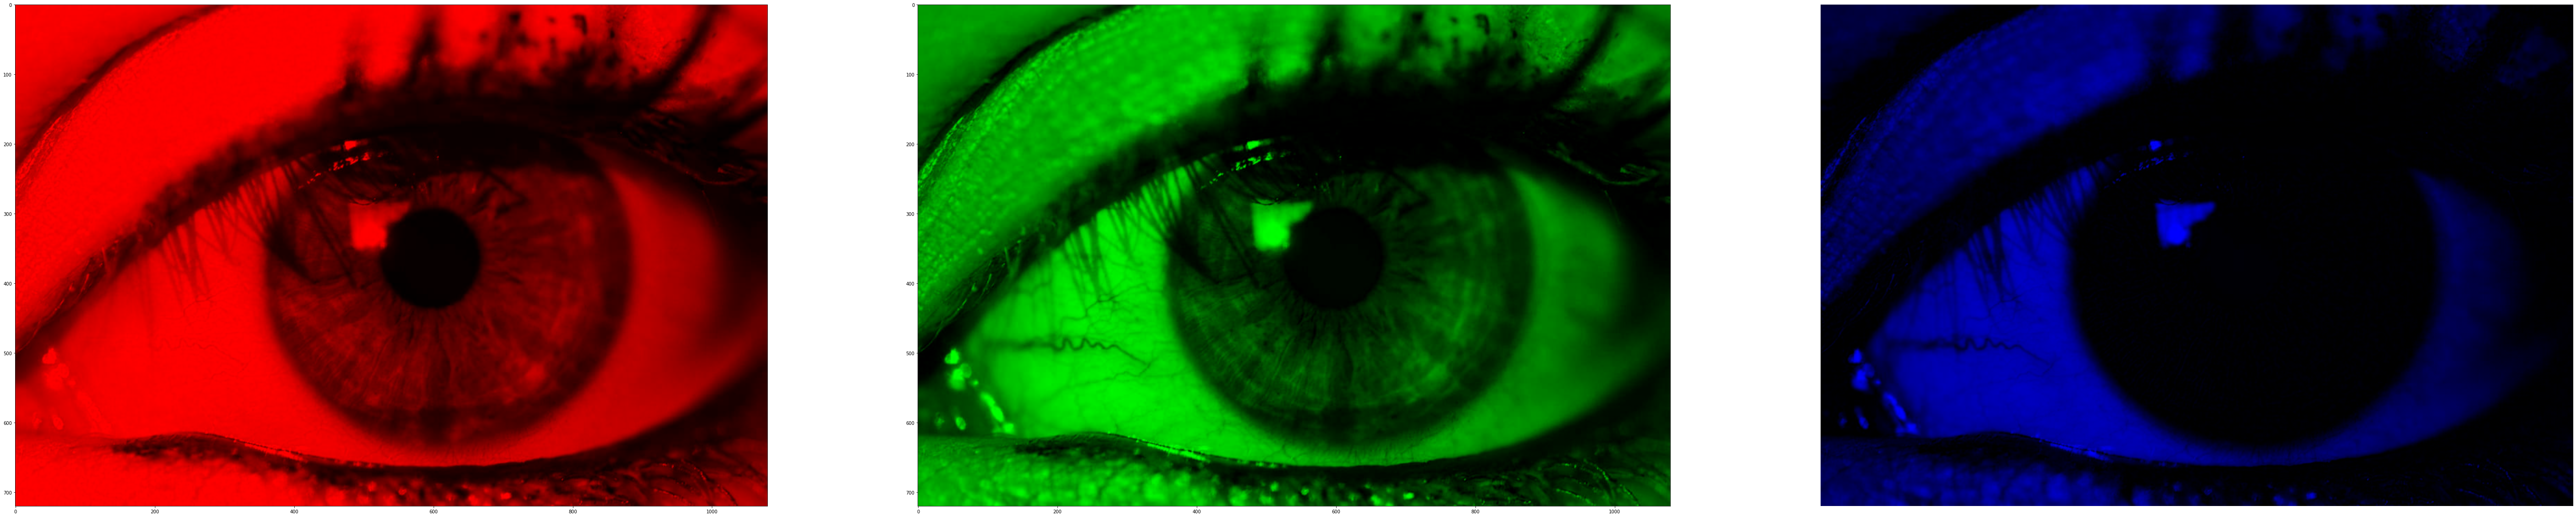

In [6]:
#seperate into 3 channel matrix

zeros = np.zeros((image_1.shape[:2]), dtype="uint8")
r = image_1[:,:,0]
g = image_1[:,:,1]
b = image_1[:,:,2]

(B,G,R) = cv2.split(image)

#test
print(R)
print(r)
print(G)
print(g)
print(B)
print(b)

#show the result
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.axis("off")
plt.rcParams["figure.figsize"] = (50,50)
ax1.imshow(cv2.merge([R, zeros, zeros])) 
ax2.imshow(cv2.merge([zeros, G, zeros]))
ax3.imshow(cv2.merge([zeros,zeros, B]))
plt.show(fig)
#convert to float32 for multiplication
image_red =  np.array(r).astype(np.float64)
image_green =  np.array(g).astype(np.float64)
image_blue =  np.array(b).astype(np.float64)

# Tutorial 1: **Gaussian Blurring** (Filter)

**Convolution**

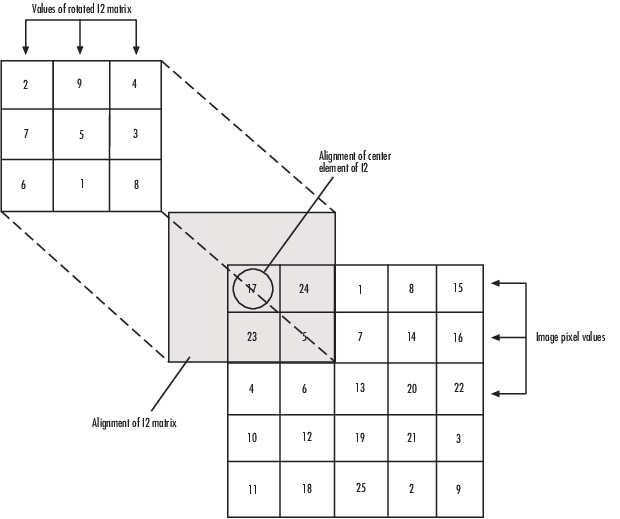

**Gaussian Kernel**

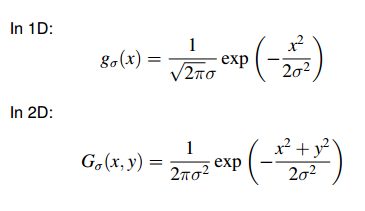

[[0.00492233 0.00919613 0.01338028 0.01516185 0.01338028 0.00919613
  0.00492233]
 [0.00919613 0.01718062 0.02499766 0.02832606 0.02499766 0.01718062
  0.00919613]
 [0.01338028 0.02499766 0.03637138 0.04121417 0.03637138 0.02499766
  0.01338028]
 [0.01516185 0.02832606 0.04121417 0.04670178 0.04121417 0.02832606
  0.01516185]
 [0.01338028 0.02499766 0.03637138 0.04121417 0.03637138 0.02499766
  0.01338028]
 [0.00919613 0.01718062 0.02499766 0.02832606 0.02499766 0.01718062
  0.00919613]
 [0.00492233 0.00919613 0.01338028 0.01516185 0.01338028 0.00919613
  0.00492233]]


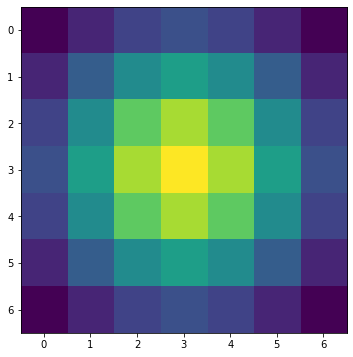

In [38]:
class kernel():
  def __init__(self,size):
    self.size = size
    #declare size of kernel, 
    self.empty_2D = np.zeros((size,size),dtype="float64")
  def gaussian(self,sigma):
    g = self.empty_2D
    center = int(self.size/2)
    for row in range(g.shape[0]):
      for col in range(g.shape[1]):
        e = np.sqrt((row-center)**2 +(col-center)**2)
        g[row,col] = np.exp(-e**2/(2*(sigma**2)))/(2*np.pi*(sigma**2))
        kernel = g/np.sum(g) #normalize filter
    return kernel
  def get_size(self):
    return self.size
#test
gauss = kernel(7)
gaussian = gauss.gaussian(2)
print(gaussian)
plt.rcParams["figure.figsize"] = (6,6)
plt.imshow(gaussian)
size_kernel = gaussian.shape[0]

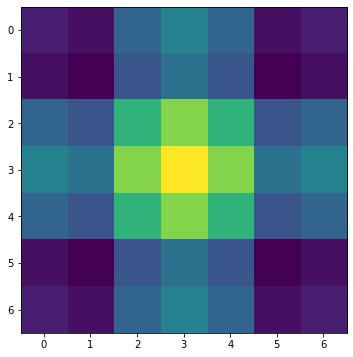

In [36]:
"""#test with OpenCV Gaussian Kernel

a = np.zeros((size_kernel,size_kernel))
center = int(size_kernel/2)
a[center, center] = 1 
plt.imshow(cv2.GaussianBlur(a,(size_kernel,size_kernel),2))"""

**Padding Image**

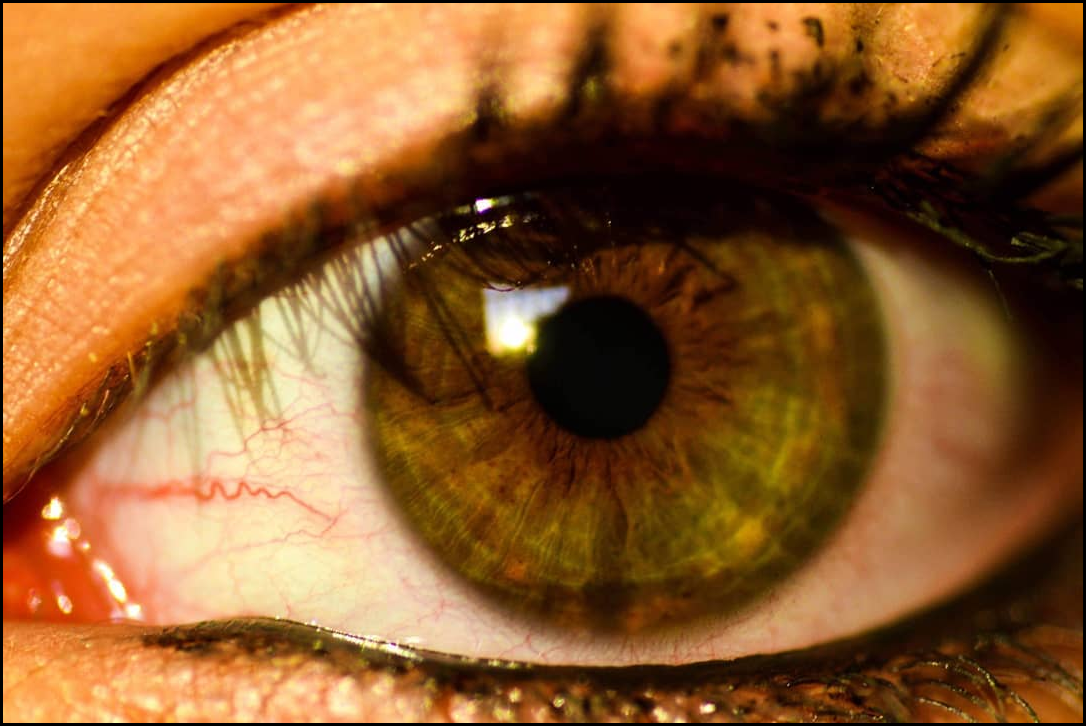

In [50]:
def padding(img,size):
  old_image_height, old_image_width, channels = img.shape
  color = (0,0,0)
  new_image_width = size-1 + old_image_width
  new_image_height = size-1 + old_image_height
  result = np.full((new_image_height,new_image_width, channels), color, dtype='float64')
  x_center = (new_image_width - old_image_width) // 2
  y_center = (new_image_height - old_image_height) // 2
  result[y_center:y_center+old_image_height, 
       x_center:x_center+old_image_width] = img
  return result

#test
pad = padding(image,size_kernel)
cv2_imshow(pad)

**convolution**

In [51]:
def conv(image_1channel, kernel, padding):
  conv_img = np.zeros((image_1channel.shape[0],image_1channel.shape[1]))
  k = kernel.shape[0]
  #flip kernel for convolution
  kernel = np.flip(kernel)
  for i in range(image_1channel.shape[0]):
    for j in range(image_1channel.shape[1]):
      mat = padding[i:i+k, j:j+k]
      conv_img[i,j] = np.sum(np.multiply(mat,kernel))
  #cv2_imshow(conv_img)
  #print(conv_img)
  return conv_img

**Blurring image**

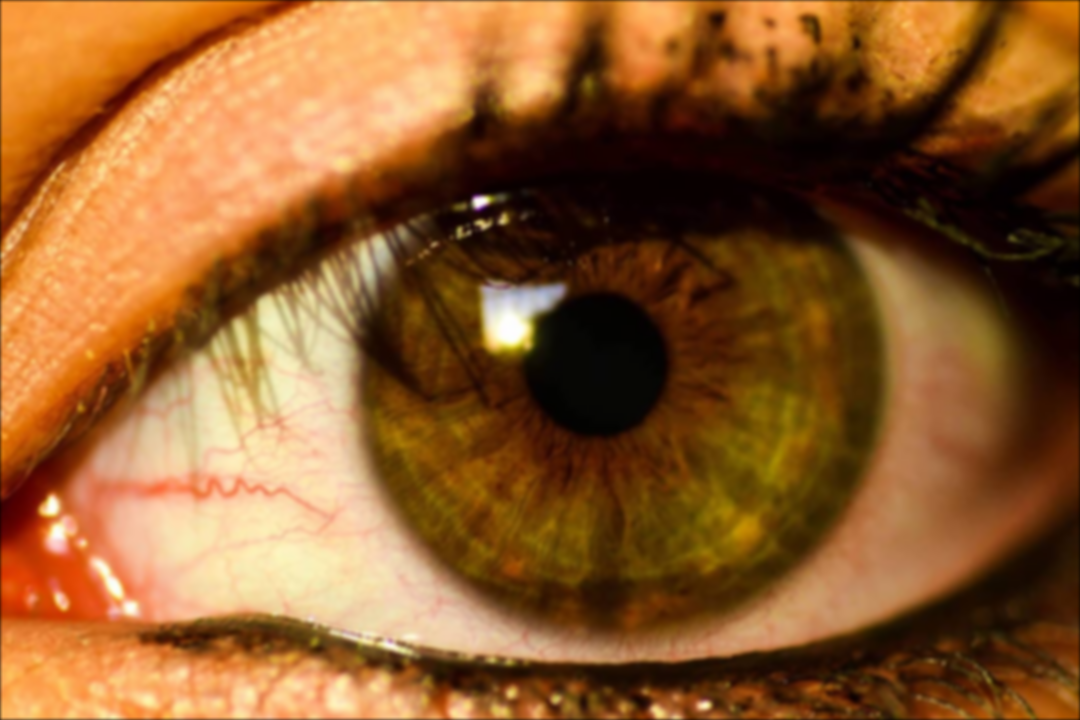

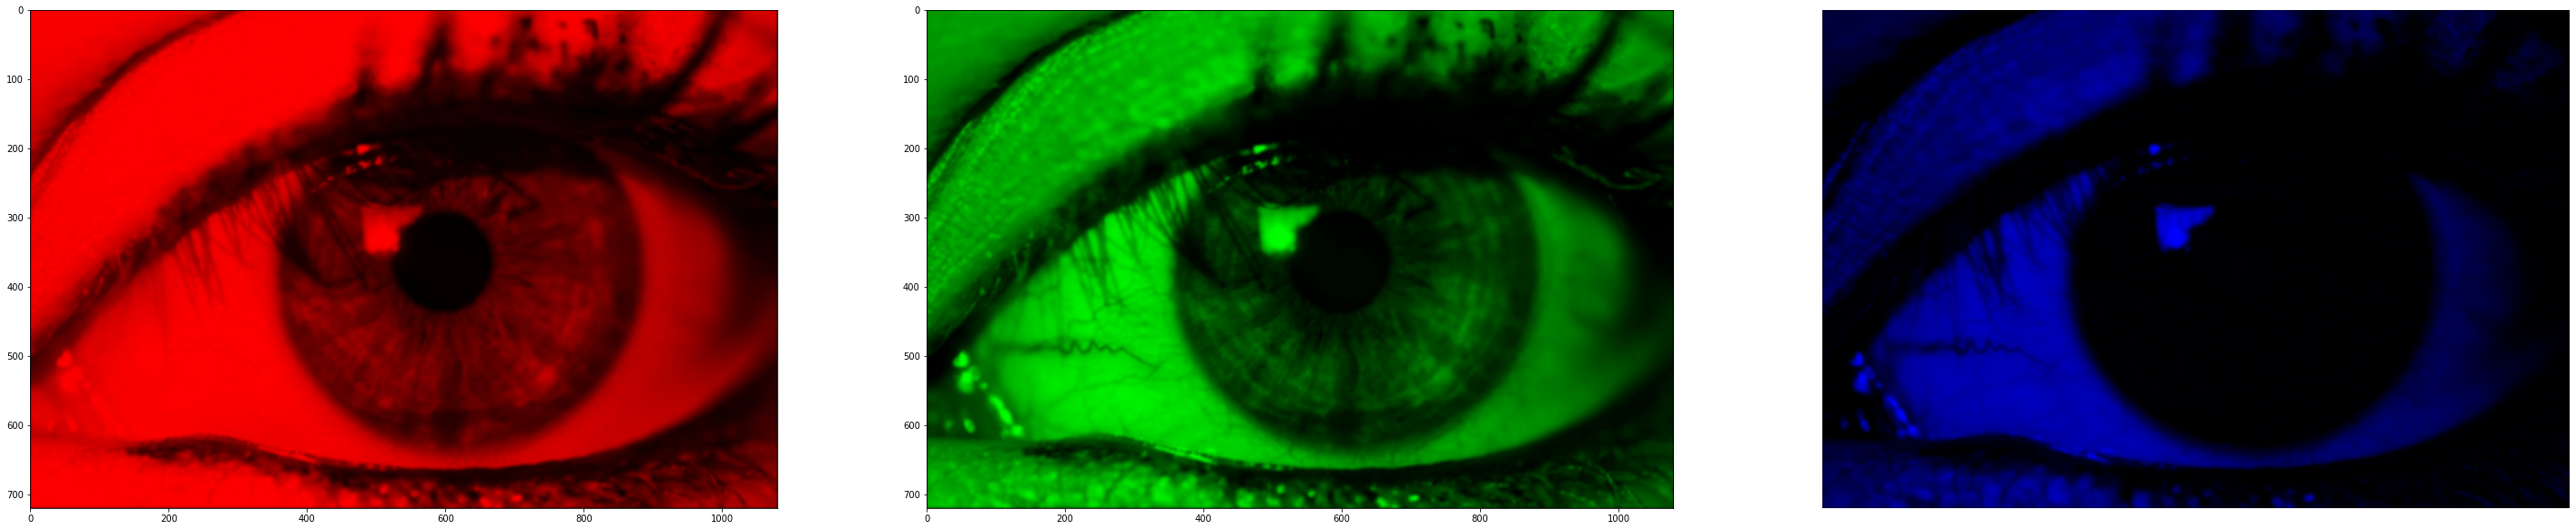

In [52]:
def GaussianBlur(image):
  zeros = np.zeros((image_1.shape[:2]), dtype="uint8")
  (B,G,R) = cv2.split(image)
  #padding
  (padb, padg, padr) = cv2.split(padding(image, size_kernel))
  #multication every channel with kernel
  R_conv = conv(R,gaussian, padr).astype(zeros.dtype)
  G_conv = conv(G,gaussian, padg).astype(zeros.dtype)
  B_conv = conv(B,gaussian, padb).astype(zeros.dtype)
  #show the result
  fig, (ax1, ax2, ax3) = plt.subplots(1,3)
  plt.axis("off")
  plt.rcParams["figure.figsize"] = (50,50)
  ax1.imshow(cv2.merge((R_conv, zeros, zeros))) 
  ax2.imshow(cv2.merge((zeros, G_conv, zeros)))
  ax3.imshow(cv2.merge((zeros,zeros, B_conv)))
  image_result = cv2.merge((B_conv,G_conv,R_conv))
  cv2_imshow(image_result)
  plt.show(fig)
  return image_result

test2 = GaussianBlur(image)

# Ex1: Re-implement Gaussian Bluring and implement Median-Bluring by yourself (Do not use openCV function)

*   Coding Median Filter
*   Coding Convolution operation

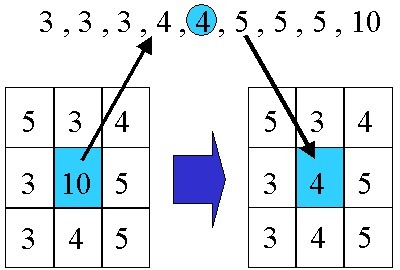 



# **Edge Detection**

edge6.png

Convert RGB-Img to Binary-Image

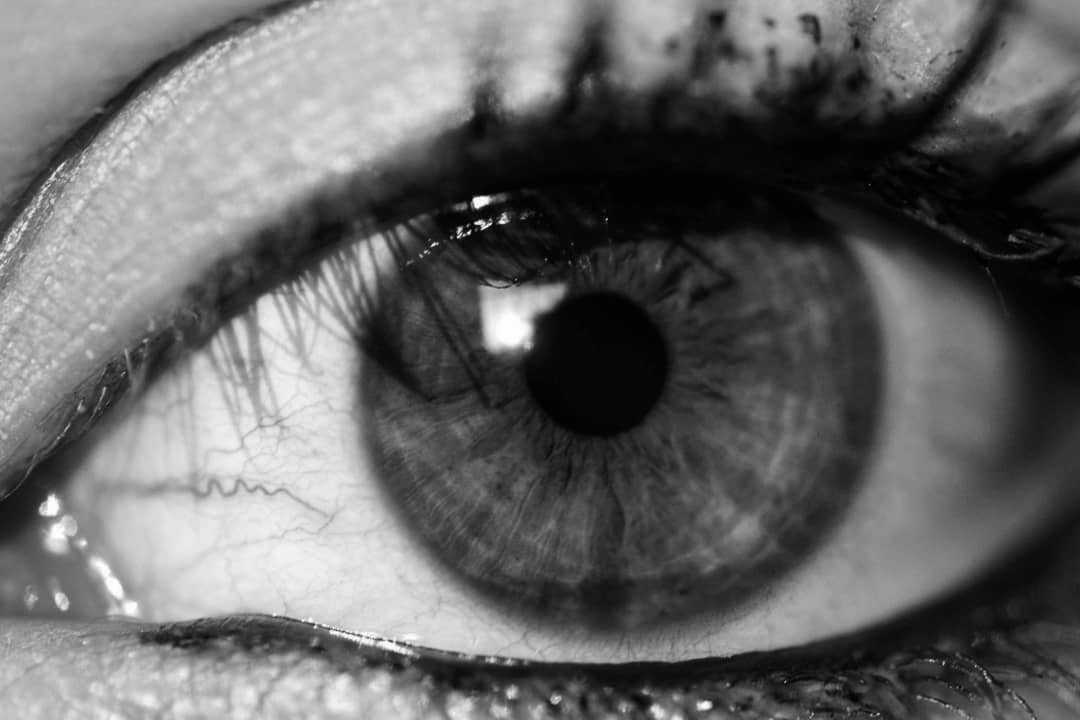

In [43]:
image = cv2.imread(os.path.join(folder_dir, "eye.jpg"))
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)
(thresh, bw_img) = cv2.threshold(gray_img,90,255,cv2.THRESH_BINARY)
cv2_imshow(bw_img)

**Image Gradient and Difference filter**

How-to-implement-Sobel-edge-detection-using-Python-from-scratch-adeveloperdiary.com-sobel.webp

derivative.png

In [58]:
class deri_filter():
  def __init__(self):
    """self.sharpen = np.array((
	                      [0, -1, 0],
	                      [-1, 5, -1],
	                      [0, -1, 0]), dtype="int")
    self.laplacian = np.array((
	                      [0, 1, 0],
	                      [1, -4, 1],
	                      [0, 1, 0]), dtype="int")
    # construct the Sobel x-axis kernel
    self.sobelX = np.array((
	                      [-1, 0, 1],
	                      [-2, 0, 2],
	                      [-1, 0, 1]), dtype="int")
    # construct the Sobel y-axis kernel
    self.sobelY = np.array((
	                      [-1, -2, -1],
	                      [0, 0, 0],
	                      [1, 2, 1]), dtype="int")"""
    self.derivative_X = np.array([[1,0,-1]], dtype="int")
    self.derivative_Y = np.array([[1],[0],[-1]], dtype = "int")
  def conv_deri(self, filter, kernel_deri, padding):
    conv_filter = np.zeros((filter.shape[0],filter.shape[1]))
    k = 3
    if kernel_deri.shape[0] == 3:
      for i in range(filter.shape[0]):
        for j in range(filter.shape[1]):
          mat = padding[i:i+k, j]
          conv_filter[i,j] = np.sum(np.multiply(mat,kernel_deri))
    elif kernel_deri.shape[1] == 3: 
      for i in range(filter.shape[0]):
        for j in range(filter.shape[1]):
          mat = padding[i, j:j+k]
          conv_filter[i,j] = np.sum(np.multiply(mat,kernel_deri))
    return conv_filter
  def diff(self, img, kernel):
    kernel = cv2.merge([kernel, kernel, kernel])
    gray_imgs = cv2.merge([gray_img, gray_img, gray_img])
    bw_imgs = cv2.merge([bw_img, bw_img, bw_img])
    pad_kernel = padding(kernel, 3)[:,:,0]
    conv_X = self.conv_deri(kernel, self.derivative_X, pad_kernel)
    conv_Y = self.conv_deri(kernel, self.derivative_Y, pad_kernel)
    pad1 = padding(gray_imgs,size_kernel)[:,:,0]
    pad2 = padding(bw_imgs,size_kernel)[:,:,0]
    diff_img_X = conv(img,conv_X,pad2)
    diff_img_Y = conv(img,conv_Y,pad2)
    image_result = np.sqrt(diff_img_X**2+diff_img_Y**2).astype(np.uint8)
    cv2_imshow(image_result)
    return image_result

#test
test3 = deri_filter().diff(bw_img,gaussian)

# Ex2: Re-implement edge detector with **Sobel derivative** filters
